In [ ]:
#following example of https://www.youtube.com/watch?v=hOLSGMEEwlI

In [45]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [73]:
#load data
cols = ['date', 'close']

df = pd.read_csv('./my_projects/STNG_stock.csv',header=0, names=cols)

df.dropna(inplace=True)


In [74]:
df.head()


,date,close
0,Jun-04-2019,26.37
1,Jun-05-2019,26.50
2,Jun-06-2019,26.14
3,Jun-07-2019,26.63
4,Jun-10-2019,26.47


In [75]:
df.describe()

,close
count,257.000000
mean,26.851440
std,6.642657
min,13.020000
25%,21.890000
50%,26.550000
75%,32.340000
max,39.690000


In [76]:
df.shape


(257, 2)

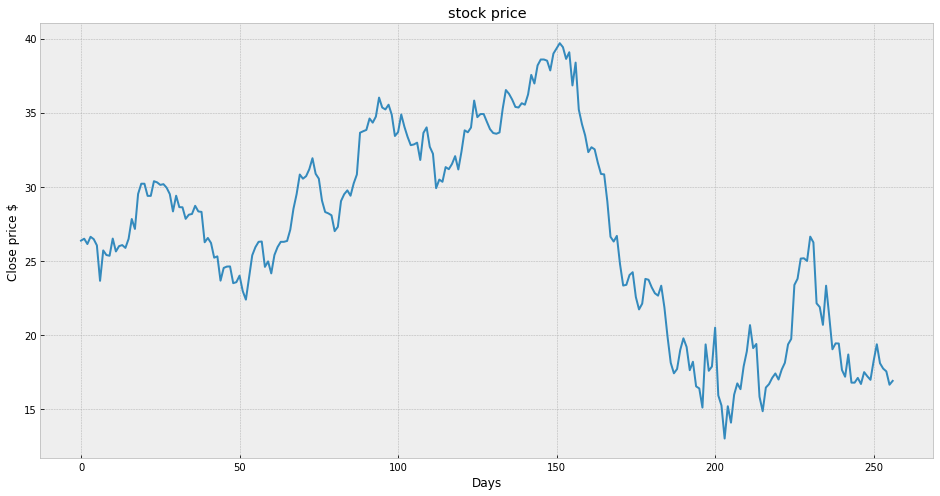

In [77]:
#visualize close price

plt.figure(figsize = (16,8))
plt.title('stock price')
plt.xlabel('Days')
plt.ylabel('Close price $')
plt.plot(df['close'])
plt.show()

In [78]:
df= df[['close']]
df.head()

,close
0,26.37
1,26.50
2,26.14
3,26.63
4,26.47


In [79]:
#create variable to predict 'x' days into future
future_days = 20

#create new column(target) 'x' days out
df['predict'] = df[['close']].shift(-future_days)
df.head()


,close,predict
0,26.37,30.21
1,26.50,29.39
2,26.14,29.39
3,26.63,30.38
4,26.47,30.30


In [80]:
#create feature data set (X) and convert to numpy and remove last 'x' rows/days

X = np.array(df.drop(['predict'], 1))[:-future_days]

In [81]:
#create target data set(y) convert to numpy array and get target values expect last x rows 
y = np.array(df['predict'])[:-future_days]

In [82]:
#split data to 75% train, 25% test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [83]:
#decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train, y_train)

# linear Reg
lr = LinearRegression().fit(X_train, y_train)

In [84]:
#get last 'x' rows of feature data set

x_future = df.drop(['predict'], 1)[:-future_days]

x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [85]:
#show model tree prediction

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show model linear regression
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[19.04  19.44  16.74  19.44  17.19  18.69  16.79  16.79  17.11  16.7
 17.5   17.22  16.98  24.16  25.4   18.1   15.2   17.55  14.835 16.91 ]

[19.04021872 19.344508   19.56185748 19.26481319 19.75022703 20.08349623
 20.98187409 21.24993845 23.88711216 24.19140143 25.17671908 25.19120904
 25.06079936 26.24897652 25.96642219 22.9887343  22.80760973 21.93821181
 23.85088724 22.34393084]


C:\Users\morte\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


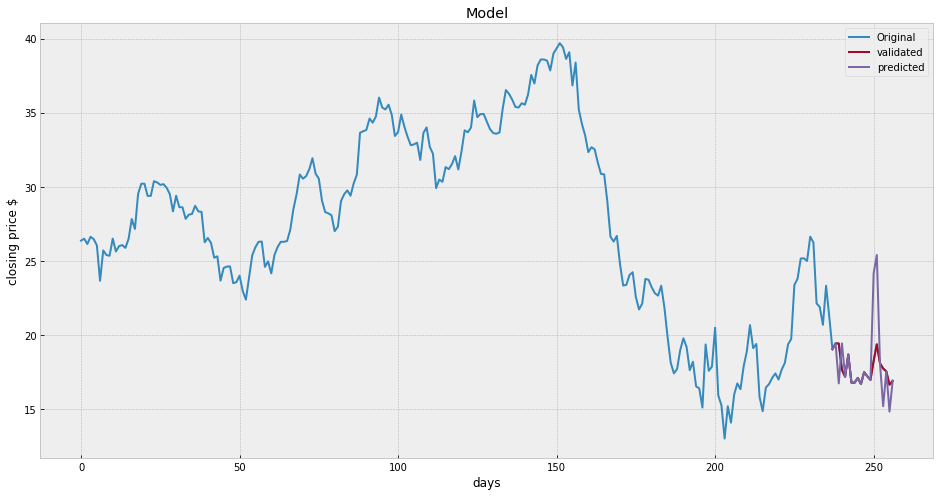

In [86]:
#visualise

predictions = tree_prediction 

valid = df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('days')
plt.ylabel('closing price $')
plt.plot(df['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Original', 'validated', 'predicted'])
plt.show()

C:\Users\morte\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


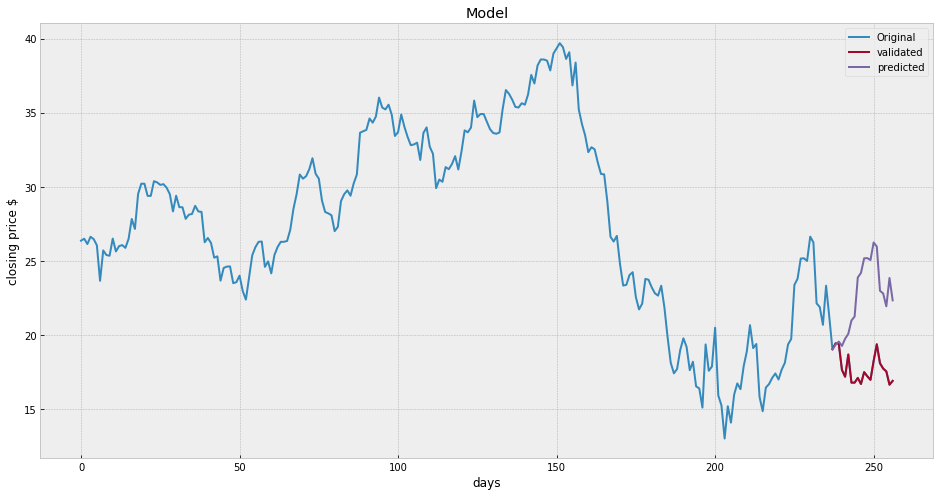

In [87]:
#visualise linear regression

predictions = lr_prediction 

valid = df[X.shape[0]:]
valid['predictions'] = predictions
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('days')
plt.ylabel('closing price $')
plt.plot(df['close'])
plt.plot(valid[['close', 'predictions']])
plt.legend(['Original', 'validated', 'predicted'])
plt.show()